In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib  inline

# 真实类别
y = np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0])
# 算法预测的概率
prob = np.array([0.42,0.73,0.55,0.37,0.57,0.70,0.25,0.23,0.46,0.62,0.76,0.46,0.55,0.56,0.56,0.38,0.37,0.73,0.77,0.21,0.39])

In [2]:
from sklearn.metrics import auc,roc_curve

In [3]:
fpr,tpr,threshold = roc_curve(y,prob)

In [4]:
fpr.shape

(12,)

In [5]:
ks = tpr - fpr

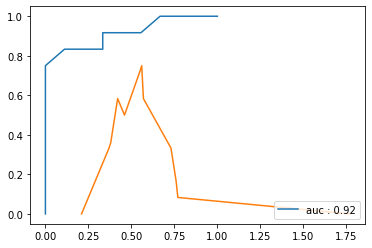

In [8]:
# ROC 曲线
plt.plot(fpr,tpr,label = 'auc : %0.2f'%(auc(fpr,tpr)))

# 洛伦兹曲线
plt.plot(threshold,ks)

plt.legend(loc = 'lower right')

In [9]:
threshold = np.arange(0,1.01,0.01)
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
fprs = []

tprs = []
for t in threshold:
    
    y_ = prob >= t
    
    y_ = y_.astype(np.int8)
    
    m = confusion_matrix(y_,y)
    
    fpr = m[1,0]/(m[0,0] + m[1,0])
    fprs.append(fpr)
    
    tpr = m[1,1]/(m[0,1] + m[1,1])
    tprs.append(tpr)

0.75


<ipython-input-13-cac34dc695e8>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = 'thredshold: 0.56',xy = (0.56,0.75),xytext = (0.8,0.85),arrowprops = {'width':5,'headwidth':10,'headlength':5})


Text(0.8, 0.85, 'thredshold: 0.56')

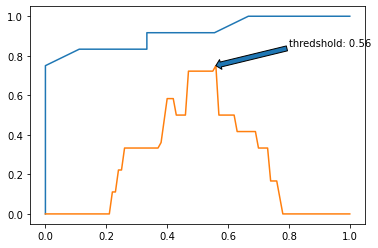

In [13]:
# ROC 曲线
plt.plot(fprs,tprs)

# 洛伦兹曲线
ks = np.array(tprs) - np.array(fprs)
plt.plot(threshold,ks)

print(ks.max())
index = ks.argmax()

threshold[index]
'''    width        The width of the arrow in points
    headwidth    The width of the base of the arrow head in points
    headlength   The length of the arrow head in points
    shrink       Fraction of total length to shrink from both ends'''
plt.annotate(s = 'thredshold: 0.56',xy = (0.56,0.75),xytext = (0.8,0.85),arrowprops = {'width':5,'headwidth':10,'headlength':5})

In [14]:
# 洛伦兹曲线 幫助我們篩選閾值